In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data:

In [17]:
#read in the data
df = pd.read_csv('data/cumulative_clean.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9201 non-null   int64  
 1   kepoi_name         9201 non-null   object 
 2   kepler_name        2742 non-null   object 
 3   koi_disposition    9201 non-null   int64  
 4   koi_pdisposition   9201 non-null   int64  
 5   koi_score          7995 non-null   float64
 6   koi_fpflag_nt      9201 non-null   int64  
 7   koi_fpflag_ss      9201 non-null   int64  
 8   koi_fpflag_co      9201 non-null   int64  
 9   koi_fpflag_ec      9201 non-null   int64  
 10  koi_period         9201 non-null   float64
 11  koi_time0bk        9201 non-null   float64
 12  koi_impact         9201 non-null   float64
 13  koi_duration       9201 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_prad           9201 non-null   float64
 16  koi_teq            9201 

### Select Features:

In [18]:
#Removing the unnecessary features
#drop columns with greater than 500 null values
missing_values_count = df.isnull().sum()
columns_to_keep = missing_values_count[missing_values_count <= 500].index
df_filtered = df[columns_to_keep]
#remove kepid, kepoi_name, koi_pdisposition and koi_tce_delivname
df_filtered = df_filtered.drop(['kepid','kepoi_name','koi_pdisposition','koi_tce_delivname'], axis=1)
df_filtered

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,2,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,1,0,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,2,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,0,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,...,2088.0,4500.53,453.3,1.0,5638.0,4.529,0.903,297.18875,47.093819,14.082
9197,1,0,0,0,0,1.739849,133.001270,0.043,3.11400,48.5,...,1608.0,1585.81,10.6,1.0,6119.0,4.444,1.031,286.50937,47.163219,14.757
9198,0,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,...,2218.0,5713.41,12.3,1.0,6173.0,4.447,1.041,294.16489,47.176281,15.385
9199,1,0,0,0,0,333.486169,153.615010,0.214,3.19900,639.1,...,557.0,22.68,14.0,1.0,4989.0,2.992,7.824,296.76288,47.145142,10.998


In [19]:
# Dealing with null data fields with mean values
df_filtered.fillna(df_filtered.mean(), inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   9201 non-null   int64  
 1   koi_fpflag_nt     9201 non-null   int64  
 2   koi_fpflag_ss     9201 non-null   int64  
 3   koi_fpflag_co     9201 non-null   int64  
 4   koi_fpflag_ec     9201 non-null   int64  
 5   koi_period        9201 non-null   float64
 6   koi_time0bk       9201 non-null   float64
 7   koi_impact        9201 non-null   float64
 8   koi_duration      9201 non-null   float64
 9   koi_depth         9201 non-null   float64
 10  koi_prad          9201 non-null   float64
 11  koi_teq           9201 non-null   float64
 12  koi_insol         9201 non-null   float64
 13  koi_model_snr     9201 non-null   float64
 14  koi_tce_plnt_num  9201 non-null   float64
 15  koi_steff         9201 non-null   float64
 16  koi_slogg         9201 non-null   float64


### Correlations between columns

                  koi_disposition  koi_fpflag_nt  koi_fpflag_ss  \
koi_disposition          1.000000      -0.013027      -0.507267   
koi_fpflag_nt           -0.013027       1.000000      -0.022295   
koi_fpflag_ss           -0.507267      -0.022295       1.000000   
koi_fpflag_co           -0.465452      -0.003622       0.146250   
koi_fpflag_ec           -0.345992       0.001408       0.092138   
koi_period              -0.006927       0.001458      -0.020058   
koi_time0bk             -0.034101       0.015797      -0.114712   
koi_impact              -0.066041       0.001844       0.042286   
koi_duration            -0.161506       0.015673       0.027303   
koi_depth               -0.253492      -0.005423       0.426244   
koi_prad                -0.022668       0.002195       0.001396   
koi_teq                 -0.276823      -0.004703       0.204909   
koi_insol               -0.041199      -0.000111       0.039754   
koi_model_snr           -0.223738      -0.007878       0.43788

<Axes: >

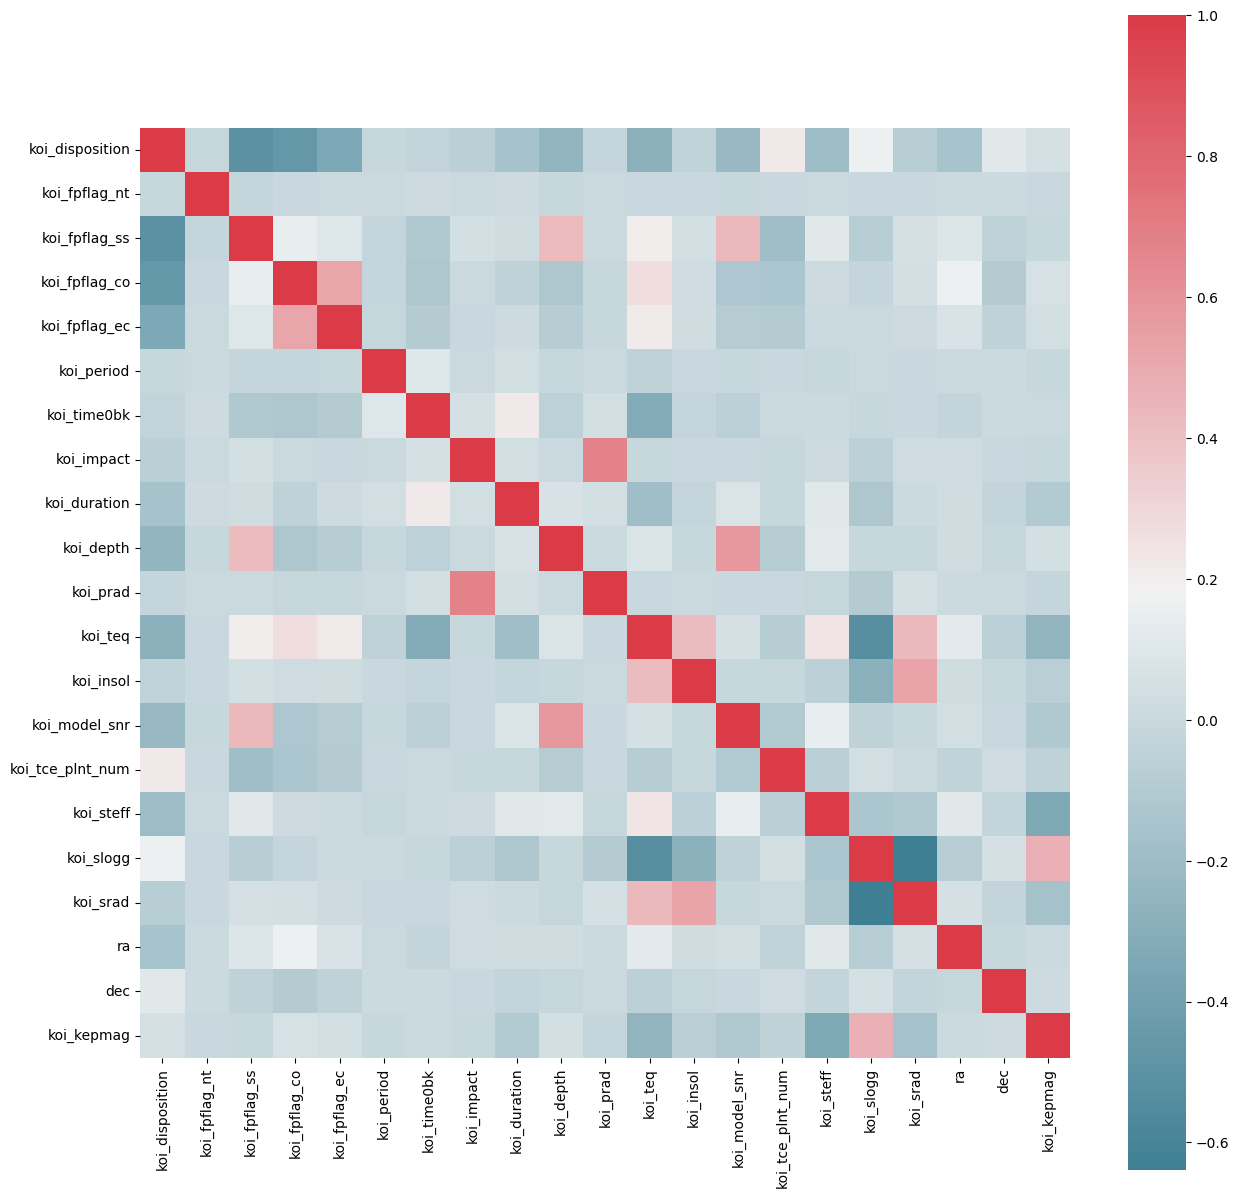

In [20]:
# Building a correlation matrix
corr = df_filtered.corr()
print(corr)
# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### PCA:
After conducting PCA, it is essential to determine the number of principal components to retain by examining the variance that each component explains. Our assessment concludes that retaining ten components is optimal for our analysis, as they cumulatively account for 95% of the variance in our data.

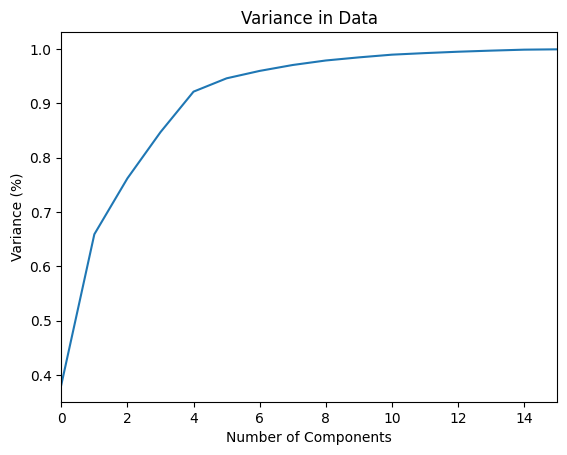

[0.38192735 0.65906318 0.76192336 0.84689481 0.92142172 0.94592255
 0.95957228 0.97043923 0.97872955 0.98444626 0.98944015 0.99232521
 0.99484814 0.99686837 0.99863981 0.99925586 0.99945192 0.9996399
 0.99982056 1.        ]


In [21]:
# remove the koi_disposition column since it is the target
data = df_filtered.iloc[:, 1:].values  
# Standardizing the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
# Applying PCA
pca = PCA().fit(data_scaled)
# plot the cumulative sum of explained variance ratio
plt.figure()
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.xlim((0, 15))
plt.title('Variance in Data')
plt.show()
# print the cumulative sum of explained variance ratio
print(np.cumsum(pca.explained_variance_ratio_))

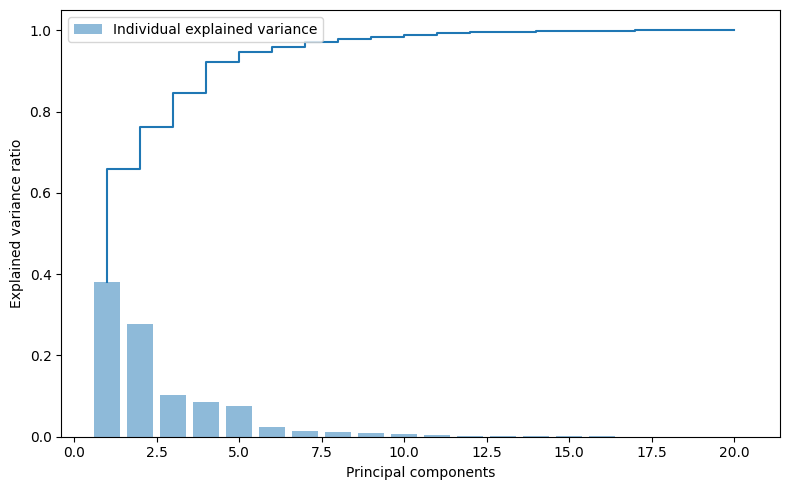

In [22]:
# draw the scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Create a DataFrame with Principal Components

In [23]:
# select the number of components
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(data_scaled)
# transform the data
reduced_data = pca.transform(data_scaled)
# create a new DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
print(reduced_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.343261 -0.075970  0.051422  0.253849  0.003980 -0.081244 -0.046744   
1 -0.349865 -0.078894  0.052039  0.253623  0.004118 -0.082667  0.093064   
2 -0.321802 -0.076565  0.002281  0.288557 -0.218721 -0.099134 -0.046764   
3  0.161064  0.768946  0.157681  0.231093  0.325747 -0.102315 -0.000461   
4 -0.354786 -0.074329  0.082732  0.237158  0.141916 -0.065260 -0.053054   

        PC8       PC9      PC10  
0 -0.022759  0.019250 -0.009743  
1  0.005999  0.026055  0.003545  
2 -0.009863  0.000027 -0.020812  
3 -0.066408  0.003374 -0.032903  
4 -0.025489  0.040814 -0.048248  


### Visualize the PCA Results:

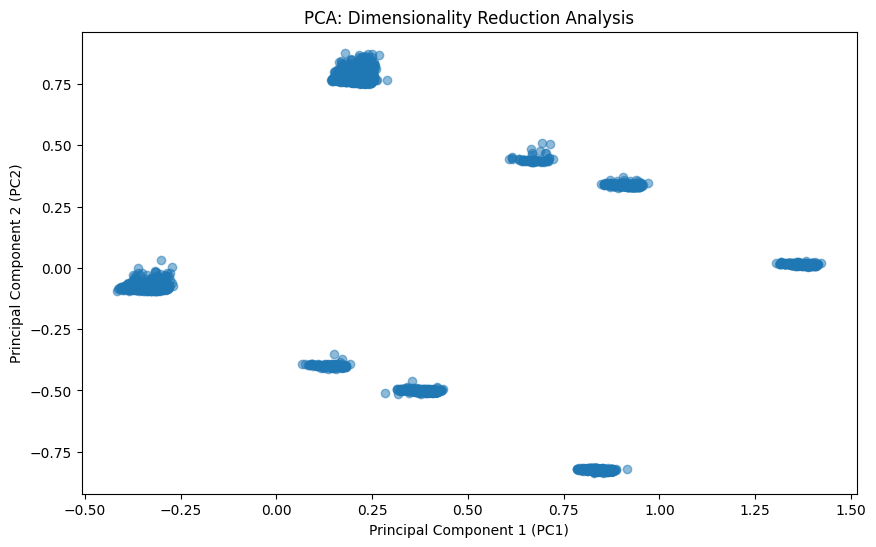

In [24]:
# 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.title('PCA: Dimensionality Reduction Analysis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

### UMAP:
To better visualize the data, we have reduced it to two dimensions.

In [25]:
# import the libraries
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from dataclasses import replace
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN

### Visualization:

/home/codespace/.python/current/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[-3.451757   -4.4768305 ]
 [ 5.83799    -3.2078817 ]
 [-4.76011    -4.467943  ]
 ...
 [ 2.6578941  13.7439785 ]
 [-1.1461958   0.8153619 ]
 [16.258018    0.40617812]]
(9201, 2)


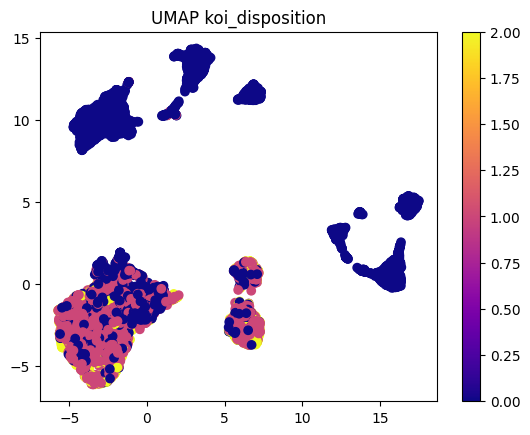

In [26]:
# UMAP
# remove the koi_disposition column since it is the target
test = df_filtered.iloc[:, 1:].values
# Standardizing the features
reducer = umap.UMAP(random_state=1)
scaled_test_data = StandardScaler().fit_transform(test)
# Applying UMAP
# create a new DataFrame
embedding = reducer.fit_transform(scaled_test_data)
print(embedding)
print(embedding.shape)
# plot the UMAP 
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df_filtered.koi_disposition, 
    cmap='plasma'
)

plt.colorbar()
plt.title('UMAP koi_disposition')
plt.show()

Text(0.5, 1.0, 'UMAP koi_fpflag_ss')

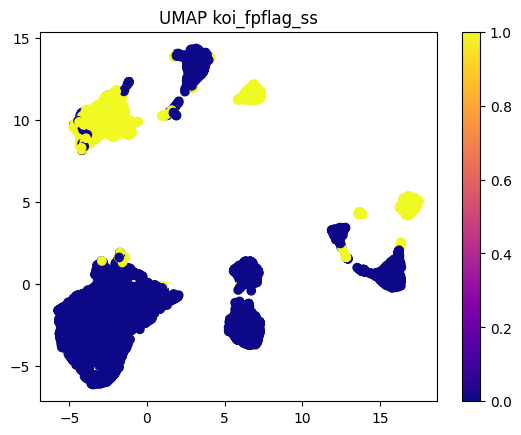

In [27]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_fpflag_ss,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_fpflag_ss')

Text(0.5, 1.0, 'UMAP koi_teq')

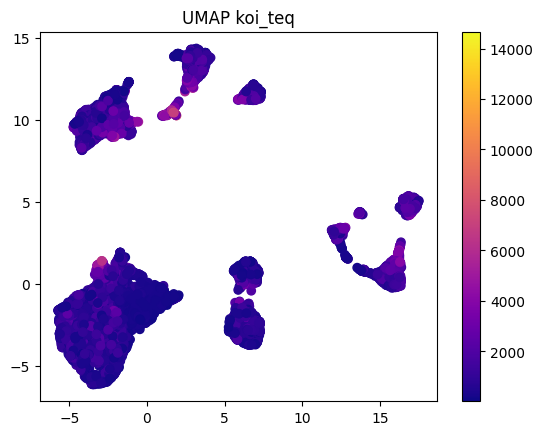

In [28]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_teq,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_teq')

Text(0.5, 1.0, 'UMAP koi_slogg')

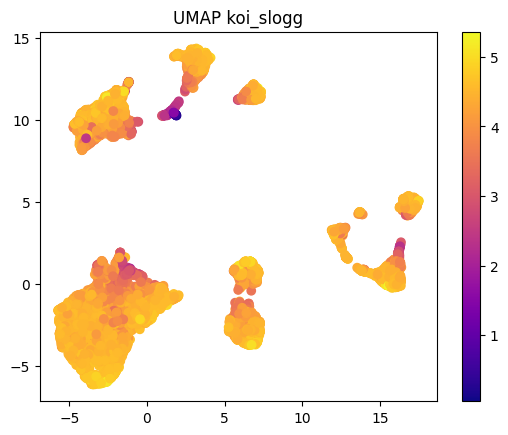

In [29]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_slogg,cmap='plasma')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_slogg')